## Installations Required

In [ ]:
pip install opencv-python

In [ ]:
pip install split-folders

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
pip install pydot

In [33]:
pip install -U efficientnet

Note: you may need to restart the kernel to use updated packages.


## Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import splitfolders
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator#, load_img, img_to_array
from keras.utils.vis_utils import plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import efficientnet.keras as efn

from glob import glob
import warnings
warnings.filterwarnings('ignore')
import os



## Split folders for train and test datasets

In [2]:
#for dirname, _, _ in os.walk('/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/PlasticDetectionModels_Datasets'):
#        print(dirname)
        
# Using the following code to randomly split dataset into train test validation folders
#splitfolders.ratio('PlasticDetectionModels_Datasets', output="output", seed=1337, ratio=(.5, 0.3,0.2)) 

train_path = "/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/train"
test_path = "/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/val"

## EDA and Train (60%), Validation (20%), Test (10%) data split

In [3]:
x_data = [] 
y_data = [] 
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.resize(img_array, (300, 300)) # cv2.resize(img_array, None,fx =2, fy=2, interpolation = cv2.INTER_AREA)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        

100%|██████████████████████████████████████████████████████████████████████████████| 3753/3753 [01:13<00:00, 51.18it/s]


In [4]:

data=pd.DataFrame({'image': x_data,'label': y_data})
data.shape

(8112, 2)

In [5]:
from collections import Counter
Counter(y_data)

Counter({'train\\Non Plastic': 4359, 'train\\Plastic': 3753})

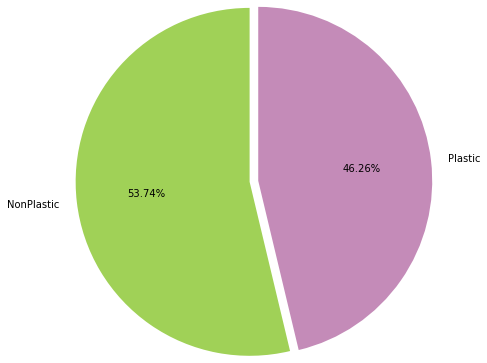

In [6]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['NonPlastic', 'Plastic'], colors= colors,radius=2)
plt.show()

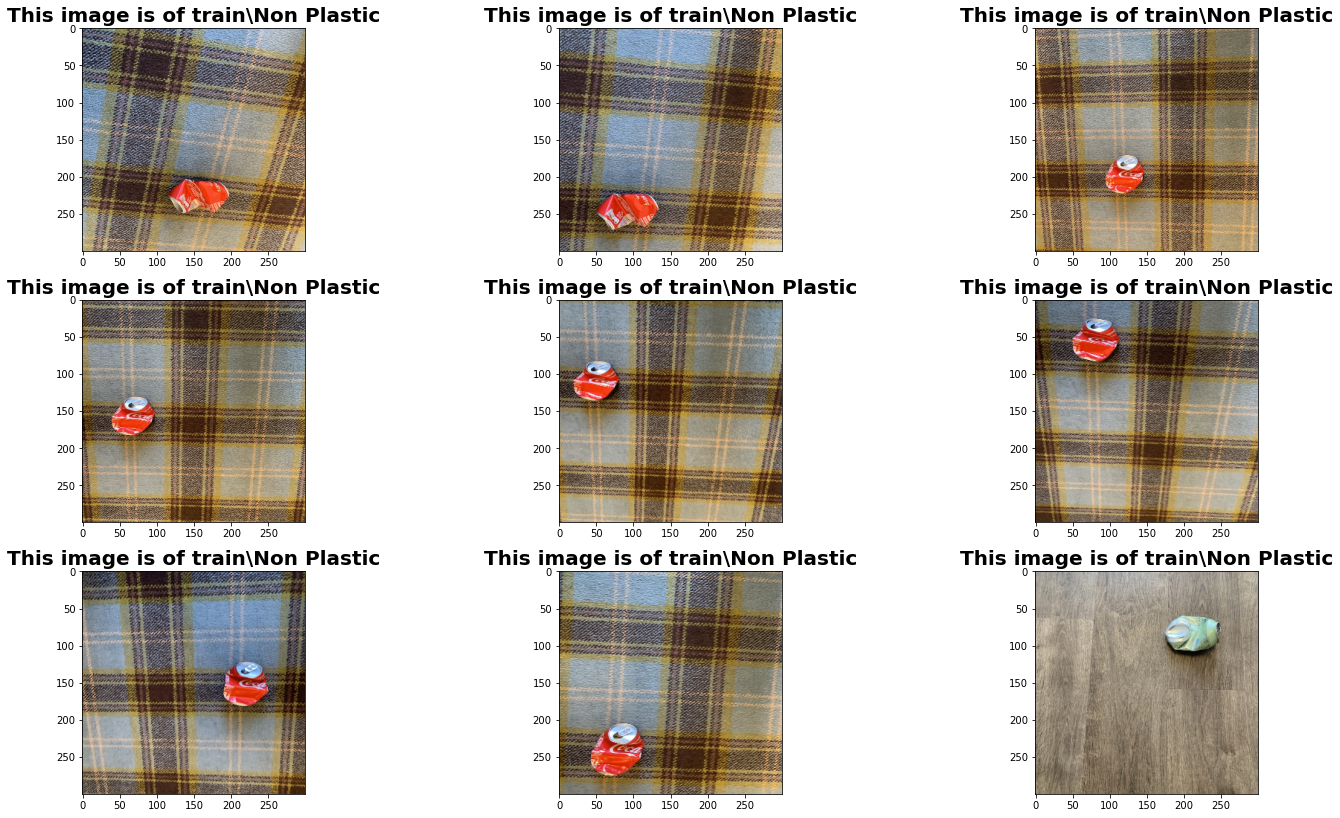

In [7]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(5000)
    plt.title('This image is of {0}'.format(data.label[i]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[i])
    plt.tight_layout()

In [8]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# MODEL 1: SIMPLE CONVOLUTION BASED CNN

In [9]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer = Adam(lr=0.000001) 
              ,loss= "binary_crossentropy"
              ,metrics = ['accuracy'])

batch_size = 256

# MODEL 1: CNN with Softmax

In [178]:
model = Sequential()
model.add(Conv2D(32, (3,3),padding='same',input_shape=(224,224,3),name='conv2d_1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_1'))
model.add(Conv2D(32, (3, 3),name='conv2d_2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_2'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

# MODEL 3: WASTE CLASSIIFCATION Convulational Neural Network - CNN 

In [270]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

# MODEL 4: CNN with Relu Activation


In [179]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (11, 11), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_190 (Conv2D)         (None, 214, 214, 32)      11648     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 71, 71, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_191 (Conv2D)         (None, 67, 67, 64)        51264     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_192 (Conv2D)         (None, 20, 20, 128)       73856     
                                                                 
 conv2d_193 (Conv2D)         (None, 18, 18, 256)     

## PREPROCESS TRAIN & TEST - AND FIT MODEL

In [271]:
# PREPROCESS TRAIN AND VALIDATION DATA 
batch_size = 32
# RESCALING ################
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

# COLOR AND PROCESS IMAGES ################
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

# COLOR AND PROCESS IMAGES ################
test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

# for _ in range(5):
#     img, label = train_generator.next()
#     print(img.shape)   #  (1,256,256,3)
#     plt.imshow(img[0])
#     plt.show()

Found 8112 images belonging to 2 classes.
Found 4850 images belonging to 2 classes.


In [272]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=5,
        validation_data = test_generator)

Epoch 1/5
254/254 [==============================] - 460s 2s/step - loss: 0.6962 - accuracy: 0.5494 - val_loss: 0.6733 - val_accuracy: 0.5963
Epoch 2/5
254/254 [==============================] - 436s 2s/step - loss: 0.6761 - accuracy: 0.5913 - val_loss: 0.6777 - val_accuracy: 0.5779
Epoch 3/5
254/254 [==============================] - 431s 2s/step - loss: 0.6697 - accuracy: 0.6036 - val_loss: 0.6841 - val_accuracy: 0.6113
Epoch 4/5
254/254 [==============================] - 483s 2s/step - loss: 0.6431 - accuracy: 0.6382 - val_loss: 0.6382 - val_accuracy: 0.6511
Epoch 5/5
229/254 [==========================>...] - ETA: 35s - loss: 0.6255 - accuracy: 0.6726

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/train\\Non Plastic\\R_5447.jpg'
Traceback (most recent call last):

  File "C:\Users\sarah\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\sarah\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\sarah\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1039, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 901, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 1048, in generator_fn
    yield x[i]

  File "C:\Users\sarah\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\sarah\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\sarah\anaconda3\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/train\\Non Plastic\\R_5447.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_134167]

## Model Evaluation

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Test Data Evaluation

In [ ]:
# Preprocessing of Test Data

test2_path = "/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/test"
test2_datagen = ImageDataGenerator(rescale= 1./255)
test2_generator = test2_datagen.flow_from_directory(
        test2_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

In [ ]:
# Predict using Model
result = model.predict(test2_generator)

In [ ]:
# Convert prediction from probability to binary
y_pred = []
for x in result:
    if x[0] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
# Extract original values for test dataset
test2_path = "/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/test"
y_test = []
flag = 0
for category in glob(test2_path+'/*'):
    if (category.rsplit('\\', 1)[1])=="Plastic":
        flag = 1
    for file in tqdm(glob(category+'/*')):
        y_test.append(flag)
    

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
        
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


## APPENDIX


In [ ]:
## TESTING TO REMOVE UNSUPPORTED IMAGES FROM THE DATASET
import os
from PIL import Image
folder_path = r'/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/test/'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

# MODEL 3: SVM

In [76]:
#param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
#svc=svm.SVC(probability=True)
#model=GridSearchCV(svc,param_grid)

model.fit(x_data,y_data)

AttributeError: 'ResNet' object has no attribute 'fit'

In [81]:
test2_path = "/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/output/test"

x_test_data = [] 
y_test_data = [] 
for category in glob(test2_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_test_data.append(img_array) 
        y_test_data.append(category.split("/")[-1])
        
# Predict using Model
result = model.predict(x_test_data)
y_pred = []
for x in result:
    if x[0] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)


print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:39<00:00, 40.07it/s]


ValueError: Data cardinality is ambiguous:
  x sizes: 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 384, 683, 683, 384, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 384, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 3024, 4032, 4032, 3024, 4032, 4032, 3024, 3264, 3024, 3264, 2448, 3264, 2448, 2448, 3024, 3024, 4032, 3264, 3264, 3264, 3264, 2448, 2448, 4032, 3264, 3264, 3264, 3264, 3264, 3264, 3024, 2448, 2448, 3264, 3024, 4032, 3024, 3024, 3024, 4032, 4032, 4032, 3024, 4032, 4032, 3024, 3024, 3024, 4032, 3024, 4032, 3024, 3024, 3024, 3024, 3024, 3024, 4032, 4032, 3024, 3024, 4032, 3024, 3024, 3024, 3024, 3024, 3024, 4032, 3024, 4032, 3024, 4032, 3024, 3024, 4032, 4032, 4032, 3024, 3024, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 3264, 4032, 384, 3264, 3264, 4032, 384, 384, 384, 3264, 384, 2448, 384, 384, 384, 384, 384, 384, 4032, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 4032, 384, 384, 384, 4032, 3024, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 4032, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 683, 683, 683, 683, 683, 384, 384, 384, 384, 384, 384, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 384, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 384, 683, 683, 683, 683, 683, 384, 384, 683, 683, 683, 683, 3024, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 3264, 3024, 4032, 3024, 3024, 4032, 4032, 4032, 4032, 4032, 3024, 4032, 4032, 4032, 3264, 3264, 3264, 4032, 4032, 2448, 3264, 3024, 3264, 2448, 2448, 2448, 2448, 2448, 2448, 3264, 2448, 4032, 4032, 3024, 4032, 4032, 3024, 4032, 4032, 4032, 4032, 4032, 3024, 4032, 4032, 4032, 4032, 4032, 4032, 4032, 4032, 3024, 4032, 4032, 3024, 4032, 4032, 3024, 4032, 4032, 3024, 3024, 4032, 3024, 3024, 4032, 4032, 4032, 3024, 3024, 3264, 4032, 4032, 4032, 4032, 3024, 4032, 3024, 4032, 4032, 4032, 179, 213, 118, 225, 183, 255, 184, 225, 177, 194, 169, 173, 168, 183, 184, 225, 133, 168, 183, 113, 259, 194, 194, 183, 174, 194, 183, 183, 143, 147, 157, 183, 177, 117, 188, 183, 143, 177, 177, 194, 119, 225, 190, 183, 197, 179, 225, 194, 183, 194, 226, 194, 197, 168, 221, 225, 226, 194, 225, 183, 168, 225, 189, 194, 167, 171, 225, 150, 160, 283, 220, 129, 236, 224, 156, 168, 225, 183, 194, 194, 194, 181, 200, 183, 243, 168, 183, 225, 195, 183, 251, 194, 203, 225, 179, 200, 194, 225, 241, 225, 167, 160, 183, 225, 255, 178, 225, 183, 183, 225, 209, 190, 225, 194, 271, 225, 225, 156, 252, 225, 183, 183, 193, 207, 159, 162, 174, 168, 225, 168, 187, 176, 183, 184, 179, 189, 273, 202, 195, 262, 168, 260, 200, 196, 183, 225, 168, 200, 275, 247, 194, 183, 194, 183, 225, 183, 210, 250, 192, 188, 194, 183, 183, 164, 194, 183, 163, 190, 177, 183, 191, 224, 191, 259, 188, 249, 194, 190, 179, 251, 183, 202, 259, 160, 297, 183, 204, 183, 197, 223, 184, 160, 225, 183, 225, 194, 162, 177, 225, 183, 189, 225, 185, 194, 159, 163, 177, 275, 183, 193, 189, 180, 192, 276, 157, 194, 195, 183, 172, 183, 212, 183, 185, 183, 200, 189, 203, 183, 168, 137, 233, 195, 169, 194, 167, 168, 194, 200, 180, 259, 175, 194, 169, 214, 195, 194, 183, 167, 168, 225, 194, 158, 138, 164, 168, 194, 225, 183, 168, 209, 184, 195, 169, 168, 169, 194, 191, 199, 168, 150, 186, 233, 260, 174, 183, 184, 183, 195, 195, 162, 275, 193, 209, 163, 183, 168, 168, 194, 169, 194, 183, 194, 183, 183, 203, 216, 170, 168, 274, 225, 225, 206, 225, 168, 225, 197, 225, 183, 160, 200, 225, 190, 168, 243, 225, 193, 225, 198, 275, 183, 225, 225, 195, 259, 160, 275, 194, 248, 275, 177, 194, 225, 202, 177, 182, 183, 289, 198, 194, 275, 194, 225, 178, 145, 225, 225, 275, 225, 194, 198, 225, 203, 225, 225, 225, 225, 173, 250, 208, 243, 221, 259, 212, 254, 225, 194, 225, 1500, 225, 201, 240, 304, 216, 295, 164, 225, 225, 194, 225, 188, 225, 295, 225, 205, 277, 225, 168, 225, 205, 225, 235, 299, 224, 225, 225, 274, 225, 194, 267, 188, 225, 225, 183, 225, 180, 163, 183, 183, 193, 129, 188, 194, 208, 192, 239, 168, 177, 225, 180, 194, 195, 163, 194, 225, 183, 168, 293, 199, 196, 225, 200, 168, 200, 225, 168, 309, 202, 224, 174, 284, 180, 306, 194, 168, 183, 189, 218, 196, 175, 153, 183, 225, 224, 180, 213, 181, 241, 280, 239, 188, 183, 169, 175, 168, 217, 196, 225, 221, 259, 194, 183, 225, 162, 225, 210, 225, 246, 194, 196, 225, 192, 229, 189, 225, 209, 225, 225, 225, 225, 160, 183, 177, 225, 225, 213, 192, 203, 225, 225, 224, 225, 215, 159, 225, 179, 225, 185, 205, 241, 183, 225, 194, 225, 226, 213, 229, 205, 194, 224, 225, 230, 225, 229, 190, 275, 194, 183, 194, 199, 225, 224, 205, 152, 185, 259, 201, 225, 191, 176, 171, 183, 225, 202, 194, 184, 200, 194, 275, 275, 229, 225, 184, 183, 148, 194, 200, 198, 225, 225, 224, 200, 225, 194, 168, 183, 184, 217, 225, 174, 183, 234, 260, 209, 225, 194, 271, 186, 171, 225, 261, 194, 225, 218, 183, 225, 184, 202, 194, 186, 225, 181, 198, 129, 252, 183, 168, 225, 275, 194, 258, 225, 186, 183, 198, 268, 221, 194, 185, 285, 287, 291, 225, 177, 275, 194, 275, 275, 259, 193, 225, 194, 225, 272, 206, 225, 172, 205, 225, 194, 183, 212, 246, 225, 314, 264, 225, 225, 224, 230, 225, 259, 249, 224, 311, 225, 243, 318, 225, 248, 225, 259, 225, 225, 197, 183, 266, 232, 225, 275, 190, 253, 262, 200, 275, 275, 259, 225, 225, 225, 253, 196, 194, 211, 275, 163, 270, 275, 176, 177, 251, 213, 225, 275, 267, 208, 180, 225, 244, 180, 226, 245, 183, 251, 259, 244, 229, 308, 194, 184, 177, 275, 162, 301, 275, 232, 275, 196, 177, 203, 185, 225, 180, 225, 225, 183, 251, 195, 201, 273, 225, 245, 178, 135, 181, 203, 186, 199, 225, 209, 195, 191, 195, 200, 194, 194, 259, 249, 225, 225, 273, 166, 225, 225, 180, 225, 167, 225, 225, 152, 225, 225, 225, 252, 224, 225, 175, 225, 236, 208, 225, 189, 231, 224, 204, 198, 292, 259, 225, 225, 225, 225, 161, 247, 225, 183, 183, 246, 225, 225, 210, 225, 200, 298, 183, 225, 225, 194, 225, 202, 225, 275, 225, 225, 194, 224, 225, 225, 154, 190, 225, 225, 194, 193, 194, 195, 189, 201, 224, 237, 225, 194, 259, 225, 225, 225, 225, 225, 225, 187, 194, 194, 200, 225, 225, 226, 183, 268, 275, 225, 189, 194, 225, 225, 205, 225, 247, 225, 162, 181, 225, 203, 194, 182, 204, 173, 254, 285, 225, 178, 170, 275, 183, 259, 225, 183, 225, 216, 225, 225, 168, 225, 224, 172, 176, 225, 164, 241, 259, 213, 183, 275, 225, 194, 225, 221, 254, 225, 194, 184, 174, 198, 247, 168, 196, 168, 225, 183, 189, 225, 225, 225, 155, 225, 185, 225, 248, 236, 225, 225, 225, 173, 168, 208, 212, 225, 225, 194, 177, 225, 225, 225, 150, 167, 225, 225, 217, 260, 225, 174, 181, 262, 225, 217, 225, 225, 194, 225, 190, 225, 182, 225, 225, 271, 225, 180, 189, 225, 225, 171, 192, 225, 168, 225, 225, 225, 219, 194, 194, 164, 225, 225, 225, 225, 225, 192, 203, 225, 242, 225, 225, 197, 182, 225, 183, 183, 177, 225, 225, 192, 225, 225, 225, 225, 225, 251, 225, 183, 225, 245, 168, 225, 225, 225, 224, 225, 168, 225, 225, 194, 225, 225, 225, 224, 194, 225, 225, 225, 194, 190, 188, 225, 197, 183, 225, 151, 183, 205, 225, 225, 225, 224, 200, 225, 225, 225, 183, 183, 201, 178, 266, 183, 225, 243, 194, 182, 168, 225, 225, 183, 225, 174, 183, 225, 183, 225, 225, 216, 225, 150, 225, 227, 175, 224, 225, 213, 225, 213, 251, 274, 171, 225, 225, 210, 225, 275, 194, 213, 194, 225, 190, 225, 187, 284, 225, 225, 225, 225, 224, 225, 225, 217, 239, 236, 225, 225, 225, 225, 168, 225, 225, 225, 168, 166, 225, 200, 225, 236, 225, 225, 225, 183, 212, 165, 280, 350, 500, 500, 500, 500, 281, 375, 405, 500, 357, 281, 500, 500, 375, 363, 350, 400, 375, 500, 374, 332, 500, 500, 399, 360, 400, 500, 282, 333, 333, 500, 500, 500, 350, 261, 300, 350, 208, 500, 500, 348, 178, 500, 333, 333, 375, 500, 316, 253, 281, 500, 500, 500, 213, 281, 363, 375, 281, 500, 375, 500, 281, 300, 375, 500, 500, 287, 214, 350, 500, 332, 320, 300, 498, 500, 500, 500, 350, 198, 188, 265, 285, 594, 2000, 121, 262, 506, 263, 175, 175, 437, 1276, 180, 500, 1200, 280, 174, 650, 300, 391, 201, 1688, 1280, 200, 661, 1080, 300, 340, 318, 224, 254, 474, 450, 408, 1236, 500, 375, 520, 510, 265, 261, 378, 800, 558, 136, 800, 728, 400, 399, 416, 121, 797, 591, 300, 293, 219, 2403, 549, 976, 701, 840, 226, 558, 800, 376, 739, 244, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 384, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 384, 683, 683, 384, 683, 683, 384, 683, 683, 683, 384, 683, 683, 384, 384, 384, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 995, 280, 956, 254, 956, 956, 1341, 1290, 1960, 1067, 280, 1065, 1024, 600, 1167, 352, 417, 1960, 1960, 533, 280, 397, 416, 800, 280, 642, 785, 1500, 1200, 276, 408, 395, 408, 506, 900, 409, 682, 678, 408, 1024, 327, 389, 408, 682, 582, 408, 408, 843, 280, 580, 667, 952, 417, 320, 280, 1158, 532, 280, 1630, 321, 267, 960, 700, 2083, 419, 384, 352, 280, 1000, 417, 681, 1200, 996, 900, 867, 270, 2000, 338, 1600, 280, 867, 280, 255, 560, 680, 333, 406, 201, 1200, 419, 683, 517, 420, 480, 564, 549, 866, 1080, 787, 459, 1334, 575, 1707, 400, 230, 628, 580, 270, 419, 280, 853, 533, 446, 1570, 247, 580, 550, 512, 3333, 581, 270, 225, 449, 1114, 668, 768, 1119, 391, 391, 225, 530, 549, 576, 1400, 768, 360, 683, 1067, 541, 450, 150, 867, 267, 280, 488, 720, 417, 338, 532, 1044, 624, 285, 407, 320, 2592, 1155, 628, 851, 288, 640, 687, 450, 529, 655, 730, 655, 335, 254, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 384, 384, 384, 384, 384, 384, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 683, 3024, 3024, 3264, 2448, 3264, 3024, 3024, 3024, 3024, 4032, 4032, 2448, 3264, 3264, 3264, 4032, 4032, 4032, 3024, 3024, 3024, 4032, 4032, 3024, 3024, 3024, 4032, 4032, 3024, 3024, 4032, 3024, 3024, 4032, 3024, 4032, 3024, 3024, 4032, 4032, 3024, 4032, 4032, 3024, 3024, 3024, 4032, 3024, 4032, 3024, 3024, 4032, 3024, 3024, 4032, 3024, 3024, 4032, 3024, 3024, 4032, 3024, 3024, 4032, 4032, 3024, 4032, 3024, 3024, 3024, 3024, 4032, 3024, 3024, 4032, 3024, 4032, 3024, 3024, 3024, 3024, 3024, 3024, 4032, 4032, 3264, 3264, 2448, 3264, 2448, 4032, 4032, 4032, 3024, 2448, 4032, 3024, 2448, 3024, 4032, 4032, 3024, 4032, 187, 174, 209, 168, 168, 168, 247, 248, 183, 194, 201, 224, 194, 225, 183, 183, 168, 230, 174, 183, 183, 168, 225, 225, 318, 225, 168, 225, 225, 194, 194, 225, 225, 194, 174, 168, 199, 183, 163, 225, 229, 194, 183, 225, 225, 151, 153, 259, 183, 229, 225, 183, 166, 275, 224, 259, 174, 175, 225, 163, 183, 225, 183, 193, 177, 225, 225, 189, 225, 225, 174, 180, 183, 224, 172, 267, 168, 225, 159, 181, 205, 206, 224, 174, 229, 183, 133, 140, 168, 129, 225, 174, 168, 170, 165, 225, 225, 183, 225, 168, 140, 225, 183, 177, 194, 225, 225, 121, 227, 281, 159, 198, 177, 194, 225, 183, 194, 168, 200, 169, 203, 183, 243, 275, 170, 168, 187, 225, 183, 183, 166, 225, 194, 225, 129, 225, 183, 275, 169, 194, 200, 225, 246, 225, 225, 194, 151, 215, 183, 275, 174, 195, 225, 183, 183, 217, 193, 225, 275, 225, 194, 168, 225, 140, 208, 194, 227, 225, 183, 225, 286, 174, 296, 211, 183, 168, 225, 184, 183, 169, 186, 225, 225, 225, 225, 225, 174, 183, 233, 251, 194, 168, 194, 186, 194, 225, 183, 259, 159, 276, 183, 183, 169, 225, 194, 183, 255, 225, 192, 225, 167, 207, 196, 225, 200, 194, 187, 174, 200, 225, 209, 194, 168, 276, 251, 275, 180, 168, 165, 218, 183, 194, 183, 199, 193, 183, 225, 225, 188, 189, 200, 191, 183, 282, 275, 241, 284, 263, 177, 184, 168, 183, 183, 225, 225, 225, 225, 275, 225, 225, 225, 225, 225, 225, 225, 225, 203, 183, 225, 183, 181, 182, 225, 225, 182, 225, 152, 225, 241, 225, 225, 225, 225, 260, 200, 162, 294, 180, 168, 177, 150, 213, 212, 225, 259, 194, 168, 225, 135, 224, 222, 124, 251, 183, 225, 183, 257, 140, 194, 225, 225, 210, 162, 194, 225, 224, 225, 201, 194, 225, 266, 225, 185, 225, 225, 225, 294, 200, 225, 175, 213, 225, 225, 225, 225, 176, 294, 189, 225, 158, 225, 200, 225, 225, 225, 224, 183, 188, 121, 194, 225, 220, 183, 169, 168, 248, 149, 183, 183, 184, 194, 162, 168, 144, 179, 172, 225, 193, 183, 194, 183, 194, 168, 207, 239, 228, 196, 122, 198, 194, 183, 198, 173, 168, 225, 225, 187, 224, 225, 170, 225, 275, 225, 225, 225, 225, 202, 200, 200, 225, 194, 188, 225, 225, 225, 225, 225, 225, 167, 181, 225, 200, 225, 219, 184, 135, 225, 225, 200, 225, 225, 225, 224, 187, 183, 225, 225, 201, 200, 225, 225, 225, 183, 243, 225, 279, 175, 225, 223, 190, 225, 194, 225, 225, 159, 247, 183, 174, 225, 238, 225, 159, 221, 251, 233, 225, 225, 175, 225, 247, 183, 226, 220, 201, 222, 147, 183, 225, 225, 169, 183, 278, 185, 168, 162, 225, 200, 154, 200, 225, 225, 183, 265, 236, 222, 211, 237, 252, 224, 206, 168, 201, 225, 225, 225, 225, 225, 193, 225, 225, 164, 220, 225, 225, 275, 143, 225, 200, 225, 225, 225, 169, 225, 182, 137, 168, 225, 168, 163, 275, 186, 186, 186, 183, 172, 183, 238, 168, 190, 165, 250, 183, 116, 225, 225, 183, 174, 134, 168, 167, 224, 183, 225, 211, 194, 275, 196, 135, 163, 179, 185, 183, 194, 183, 183, 194, 168, 225, 215, 225, 225, 142, 225, 225, 225, 236, 225, 183, 225, 183, 225, 225, 246, 225, 225, 225, 183, 183, 194, 123, 177, 225, 193, 233, 275, 137, 200, 225, 168, 225, 209, 267, 225, 225, 225, 225, 230, 162, 189, 225, 162, 225, 225, 194, 275, 225, 128, 212, 225, 206, 183, 246, 275, 188, 225, 225, 278, 225, 173, 225, 159, 225, 198, 204, 168, 168, 174, 225, 183, 225, 193, 203, 177, 178, 275, 194, 223, 183, 183, 132, 276, 227, 216, 168, 154, 183, 194, 168, 194, 198, 222, 193, 225, 225, 225, 182, 225, 145, 183, 211, 165, 168, 161, 162, 183, 184, 254, 184, 400, 3648, 3373, 3648, 1800, 4000, 3872, 4724
Make sure all arrays contain the same number of samples.

In [77]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def create_plain_net():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 64
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [4, 10, 10, 4]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            downsample = (j==0 and i!=0)
            t = Conv2D(kernel_size=3,
                       strides= (1 if not downsample else 2),
                       filters=num_filters,
                       padding="same")(t)
            t = relu_bn(t)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [79]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

def create_res_net():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 64
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 5, 5, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [82]:
x_test_data = [] 
y_test_data = [] 
for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.resize(img_array, (300, 300)) # cv2.resize(img_array, None,fx =2, fy=2, interpolation = cv2.INTER_AREA)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_test_data.append(img_array) 
        y_test_data.append(category.split("/")[-1])
        

100%|██████████████████████████████████████████████████████████████████████████████| 2237/2237 [00:29<00:00, 75.48it/s]


In [91]:
# initialize the optimizer and model
print("[INFO] compiling model...")
model = ResNet.build(64, 64, 3, 2, (2, 3, 4),(32, 64, 128, 256), reg=0.0001)
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
# train the network
print("[INFO] training network for {} epochs...".format(EPOCHS))
H = model.fit(
    x=aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS)

[INFO] compiling model...


NameError: name 'ResNet' is not defined

In [102]:
from cloud_tpu_client import Client
c = Client()
c.configure_tpu_version(tf.__version__, restart_type="always")

ModuleNotFoundError: No module named 'cloud_tpu_client'

In [103]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [104]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

In [105]:
# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [110]:
from tensorflow.keras.applications import EfficientNetB0

with strategy.scope():
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    outputs = EfficientNetB0(include_top=True, weights=None, classes=2)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

model.summary()

epochs = 5  # @param {type: "slider", min:10, max:100}
hist = model.fit(data, epochs=epochs, validation_data=(x_test_data,y_test_data), verbose=2)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 img_augmentation (Sequentia  (None, 224, 224, 3)      0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [111]:
data.map(lambda image, label: (tf.image.resize(image, size), label))

AttributeError: 'DataFrame' object has no attribute 'map'

# PRODUCT PREDICTION

In [269]:
import re
import pandas as pd
data = pd.read_excel("amazon_scraper/AmazonGroceryItemsExcel.xlsx")
data

,asin,Title,MainImage,Rating,NumberOfReviews,Items,MoreInfo,unit,Cat,Unnamed: 9,Quantity,Unit,Packs
0,B07W5X9WS5,"Amazon Brand - Happy Belly Tonic Water, 33.8 O...",https://m.media-amazon.com/images/I/31mlPHGX2k...,4.4,999 ratings,One 33.8 oz bottle of Happy Belly Tonic Water...,"Brand: Happy Belly,Variety: Tonic,Flavor: Toni...",NaN,Alcohol,"Brand: Happy Belly,Variety: Tonic,Flavor: Toni...",33.80,Ounce,NaN
1,B07VPWR7YY,RITUAL ZERO PROOF Whiskey Alternative | Award-...,https://m.media-amazon.com/images/I/31jWw0PPZJ...,2.9,"3,605 ratings",BUILT FOR COCKTAILS â€“ Our non-alcoholic whi...,"Flavor: Whiskey Alternative,Brand: Ritual Zero...",NaN,Alcohol,"Flavor: Whiskey Alternative,Brand: Ritual Zero...",3.30,Pounds,NaN
2,B0083PR72S,"Jordan's Skinny Mixes Margarita, Sugar Free Co...",https://m.media-amazon.com/images/I/31ZmKoFRi2...,4.3,"2,165 ratings","Flavor Notes - The perfect blend of tart, fre...","Brand: Jordan's Skinny Mixes,Flavor: Margarita...","Size: , 32 Fl Oz (Pack of 1)",Alcohol,"Size: , 32 Fl Oz (Pack of 1)",32.00,Oz,NaN
3,B08D7QQS9C,Ariel Cabernet Sauvignon Wine 750ML 2 PACK Alc...,https://m.media-amazon.com/images/I/41rW2ztNQ-...,3.2,644 ratings,ARIEL oak-aged Cabernet Sauvignon offers arom...,NaN,NaN,Alcohol,0,750.00,ml,2.0
4,B081XDRRWT,Angostura Aromatic Bitters and Orange Bitters ...,https://m.media-amazon.com/images/I/51i5pAZqCW...,4.8,"1,241 ratings",NaN,NaN,NaN,Alcohol,0,4.00,Oz,NaN
5,B085GV73MC,Enfamil Enspire Baby Formula with Immune-Suppo...,https://m.media-amazon.com/images/I/51m2K29M1o...,4.9,999 ratings,BRAIN BUILDING and IMMUNE SUPPORT: DHA has be...,"Brand: Enfamil,Size: 15 Ounce (Pack of 8),Item...","Style: , 30oz Powder Refill 4 Pack",Baby Food,"Style: , 30oz Powder Refill 4 Pack",30.00,Oz,4.0
6,B07L9ZWPNC,"Gerber Baby Food 2nd Foods Variety Pack, Fruit...",https://m.media-amazon.com/images/I/51-NLczjYJ...,4.8,"6,553 ratings",Growing nutrition: Our 2nd foods baby food re...,NaN,NaN,Baby Food,0,8.00,Ounce,32.0
7,B073WZ8MWP,Plum Organics Baby Food Pouch | Mighty Veggie ...,https://m.media-amazon.com/images/I/51NnXwYceN...,4.7,"2,261 ratings","ORGANIC BABY FOOD: Made with non-GMO, and org...","Brand: Plum Organics,Weight: 4 Ounces,Size: 1 ...",NaN,Baby Food,"Brand: Plum Organics,Weight: 4 Ounces,Size: 1 ...",4.00,Ounce,18.0
8,B00XCLFZZE,Happy Baby Organics Yogis Freeze-Dried Yogurt ...,https://m.media-amazon.com/images/I/51tdAk2Ejh...,4.7,"5,946 ratings",Sweet Yogi: Little drops of goodness Made wit...,NaN,NaN,Baby Food,0,1.00,Ounce,3.0
9,B00G6E6EFO,Happy Tot Organics Stage 4 Super Morning Organ...,https://m.media-amazon.com/images/I/51SZAUguaq...,4.7,"3,502 ratings","Super Morning Meals: Hello, sunshine! Enjoy a...","Brand: Happy Baby,Flavor: Bananas Blueberries ...",NaN,Baby Food,"Brand: Happy Baby,Flavor: Bananas Blueberries ...",4.00,Ounce,8.0


In [ ]:

# Preprocessing of Test Data

test2_path = "/Users/sarah/OneDrive/Desktop/PlasticProductDetection/PlasticDetectionOnlineProducts/Testing"
test2_datagen = ImageDataGenerator(rescale= 1./255)
test2_generator = test2_datagen.flow_from_directory(
        test2_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")# Predict using Model
result = model.predict(test2_generator)
# Convert prediction from probability to binary
y_pred = []
for x in result:
    if x[0] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
# Extract original values for test dataset
y_test = [0,1,0,1,0,1,1,1,1,1,1,1]
    

0
1
2
3
4
5
6
7
8
9
10
11
-------Items
 , , ,by entering your model number., ,
, GREAT COCKTAILS WITHOUT ALCOHOL: Whether midweek, relaxing at home, new parent or just looking for something exceptional, Seedlip Garden 108 brings a perfectly balanced & refreshing experience to any occasion. We are not a gin, vodka, tequila or rum alternative. We have created our own range of spirits with incredible and distinct flavors, focused on bringing sophistication and experience to those moments that matter.  , QUALITY INGREDIENTS: Seedlip is made from six carefully selected botanicals and spices. All our ingredients are high quality, carefully sourced & uniquely combined. Our plants serve the palate with a unique & natural tasting flavor.  , NON ALCOHOLIC: Seedlip Garden 108 is a non-alcoholic spirit which contains notes of Peas, Rosemary & Thyme and provides a perfect option for crafting delicious alternative cocktails at home. For more inspiration, why not try our other flavours: The Citrus Se

6g
1051
1052
1053
1054
1055
-------Items
 PREMIUM QUALITY - Our mini pita bread is made from top quality, wholesome ingredients. True to tradition, each pita is hearth baked to a perfect golden brown.  , NUTRITIONAL FACTS - Cholesterol Free and Trans Fat Free. Certified Kosher Pareve. Each serving (5 pieces) has 6g of Protein, 2g of Dietary Fiber, 0g of Trans Fat and 0mg of Cholesterol.  , DELICIOUS & VERSATILE - Convenient, versatile and less splitting than the leading brand. Can be filled with meats, salad or cheese. Our Mini Pita Pitettes are great for parties and holidays. We love them for appetizers, sliders, snacks and mini sandwiches. Each Mini Pita is approx. 2.5 inches.  , HOW TO USE - Unopened packages can be frozen for up to 8 months. Thaw frozen Pita Bread for 2-3 hours. 7-9 days shelf life after defrost.  , WHAT’S INCLUDED - Includes 3 Packages of Toufayan Classic White Mini Pitettes Pita Bread, about 60 mini pitas total.  
6g
1056
1057
1058
1059
1060
-------Items
 REAL BR

 Applegate, Natural Uncured Black Forest Ham Family Size, 10.5oz  , No Antibiotics or Added Hormones  , No Chemical Nitrites or Nitrates  , No Artificial or GMO Ingredients  , Humanely Raised  , Gluten Free  , Dairy Free  , Casein Free  
5oz
2021
2022
2023
2024
-------Items
 Grilled Artichokes Halves  , 2 Pack, Total of 24oz (680g)  , Product of Peru  
24oz
2025
2026
2027
2028
-------Items
 READY TO EAT TUNA SALAD: Behold, the thing sandwiches dream about. Crisp celery, crunchy water chestnuts and a delightfully tangy sauce pair with select cuts of premium wild caught, dolphin safe tuna to make a mouthwatering sandwich or salad.  , GOOD SOURCE OF PROTEIN: Tuna is an excellent, natural source of protein and Omega 3s. With 80 calories and 13g of protein, this nutrient dense tuna pouch is perfect for an active lifestyle and works well with Mediterranean and Weight Watchers diets.  , ADD VARIETY TO YOUR DIET: Tuna is a wholesome choice for a snack or meal. StarKist Tuna Creations Deli Styl

3095
-------Items
 ✔ 2 USDA PRIME RIBEYE (18oz each) | ✔ 2 USDA PRIME STRIPLOIN (12oz each) – Steaks are Certified Prime Grade,, 100% Grass-Fed, Non-GMO Verified, Premium Cut  , ✔ 10 MAINE LOBSTER TAILS (5-6oz each) | ✔ 4 HIGH GRADE WILD CAUGHT TUNA STEAKS (4oz each) | ✔ 24 JUMBO SOFT SHELL CRABS  , ✔ 2Lbs PREMIUM QUALITY BLACK TIGER SHRIMP | ✔ 1Lb WHOLE CLAMS  , FLASH FROZEN PACKAGING – Environmentally Stable & Package Tested using Eco-Friendly Materials. We implement Flash Freezing Methods to Preserve Moisture and Protect Product Quality  , DELIVERED TO YOUR HOME FAST – True Grade is a USA Family-Owned business. Proud to Bring You Exceptional Seafood, High-Quality Meats and a Tasty Array of Quality Foods. Processing of orders is from Monday- Wednesday only.  
18oz
3096
3097
3098
-------Items
 MORE SAUSAGE THAN MEAT STICK: Crafted by real butchers, these meaty 2 oz. sausage links are the real deal.  , PROTEIN PACKED: Each Butcher Snack Stick contains 18g protein (Yeah, you read that r

4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
-------Items
 Pack of twenty four, 3.25-ounce (total of 78 ounce)  , Wild Caught; Boneless  , 2g omega-3 per serving  , From managed fisheries  
2g
4207
4208
4209
4210
4211
-------Items
 CLASSIC BEEF STICK: 100% grass-fed beef stick mixed with onion, white pepper, black pepper, ginger, and lemon peel; Perfect for convenient snacking at home or on the go  , PERFECT FOR SNACKING ANYWHERE: Our Classic Beef Stick is great for snacking anytime and anywhere, whether you're at the office, at school, traveling, camping, backpacking, running errands, or relaxing at home  , EASY-TO-EAT PROTEIN SNACK: Our Classic Beef Stick is the perfect, portable protein snack; An easy-to-eat meat snack with 6g of protein and just 80 calories per stick  , BEEF SNACKS YOU CAN FEEL GOOD ABOUT: Made with 0g of sugar, Whole30 Approved, Certified Paleo, Certified Keto, Gluten-Free, and raised without added hormones or the use of antibiotics  , THE NEW PRIMA

In [201]:
data.unit

0                                  NaN
1                                  NaN
2        Size: , 32 Fl Oz (Pack of 1) 
3                                  NaN
4                                  NaN
                     ...              
4901                               NaN
4902                               NaN
4903                               NaN
4904                               NaN
4905                               NaN
Name: unit, Length: 4906, dtype: object